#회귀분석
데이터 추세 분석을 위한 알고리즘 (ex) $y=ax+b$)

추세분석을 하면 데이터($x$)에 대한 결과($y$) 예측 가능


###종류
1. 선형회귀 : $y=f(X)$ (공부량과 시험성적, 빈곤률과 10대청소년 임신)
2. 논리회귀 : $y=$True $or$ False (합격여부 판별, 질병감염여부 판별)

##1. 선형회귀
목적 : 주어진 데이터를 통해 데이터에 맞는 수식을 찾는 방식

수식은 대략 변수의 선형 결합식으로 표현

$y=f(x)$

딥러닝에서 출력계층에 활성화 함수X



##2. 논리회귀
목적 : 주어진 데이처를 통해서 결과의 참-거짓 판별

$y = σ(f(x))$

딥러닝 출력계층에 활성화 함수O

In [33]:
# 논리회귀 예시

#라이브러리 호출
import torch
import torch.nn as nn
import torch.optim as opt
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('./3-6 mba_admission.csv')

In [5]:
print(data.columns)
print(data.shape)
data.head()

Index(['gmat', 'gpa', 'work_experience', 'admitted'], dtype='object')
(40, 4)


,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [20]:
#연습용 자료라 데이터의 양이 너무 적은 관계로 Train,Vaild,test 용도는 따로 만들지않음
class dataset(torch.utils.data.Dataset):
  def __init__(self,data):
    self.data = data
    self.data['gmat'] /= self.data['gmat'].max()
    self.data['gpa'] /= self.data['gpa'].max()
    self.data['work_experience'] /= self.data['work_experience'].max()

  def __getitem__(self,idx):
    X = torch.Tensor(self.data[self.data.columns[:3]].values)
    Y = torch.Tensor(self.data['admitted'])
    return X[idx,:], Y[idx]

  def __len__(self):
     return self.data.shape[0]

In [21]:
train_dataset = dataset(data)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=8,shuffle=True,drop_last=False)

In [22]:
 #neural network 모델 생성
 #구조 : 입력(3), 은닉(10), 출력(1)
 #출력 :           tanh     sigmoid
 class admission_model(nn.Module):
   def __init__(self):
     super(admission_model,self).__init__()
     self.lin1 = nn.Linear(3,10)
     self.lin2 = nn.Linear(10,1)

   def forward(self,x):
     x = self.lin1(x)
     x = F.tanh(x)
     x = self.lin2(x)
     x = F.sigmoid(x)
     return x

In [23]:
model = admission_model()
optim = opt.SGD(model.parameters(),lr=0.5)

In [26]:
#학습단계
for ep in range(100): #epoch 100회
  loss_buffer=[]
  for X,Y in train_loader: #epoch 마다 각각의 batch단위 학습
    optim.zero_grad()
    y_infer = model(X) # y_infer.shape == (8,1) gkwlaks Y.shape == (8,)
    Y = Y.view(-1,1)
    loss = -torch.mean(Y*torch.log(y_infer)+(1-Y)*torch.log(1-y_infer))# loss == creoss entropy 거리함수
    loss.backward()
    optim.step()
    loss_buffer.append(loss.item())
  if ep % 10 == 0:
      print('Eopch: {}, loss: {}'.format(ep,np.mean(loss_buffer)))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Eopch: 0, loss: 0.6143982291221619
Eopch: 10, loss: 0.26876443326473237
Eopch: 20, loss: 0.1701519951224327
Eopch: 30, loss: 0.12923722267150878
Eopch: 40, loss: 0.08824908435344696
Eopch: 50, loss: 0.09995704516768456
Eopch: 60, loss: 0.06930611673742533
Eopch: 70, loss: 0.0626559529453516
Eopch: 80, loss: 0.06080187996849418
Eopch: 90, loss: 0.030162534769624473


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'MBA admssion result include prection')

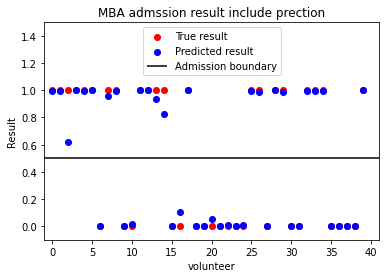

In [34]:
# 결과 시각화
y_infer = model(torch.Tensor(data[data.columns[:3]].values))

plt.scatter(np.arange(data.shape[0]),data['admitted'],color='red',label='True result')
plt.scatter(np.arange(data.shape[0]),y_infer.detach().numpy(),color='blue',label='Predicted result')
plt.hlines(0.5,-10,60,label='Admission boundary')
plt.legend(loc='upper center',fontsize='10')
plt.xlim(-1,41)
plt.ylim(-0.1,1.5)
plt.xlabel('volunteer')
plt.ylabel('Result')
plt.title('MBA admssion result include prection')
